In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
# from pytesseract import pytesseract

pytesseract.pytesseract.tesseract_cmd = "C:\Program Files\Tesseract-OCR\\tesseract.exe"

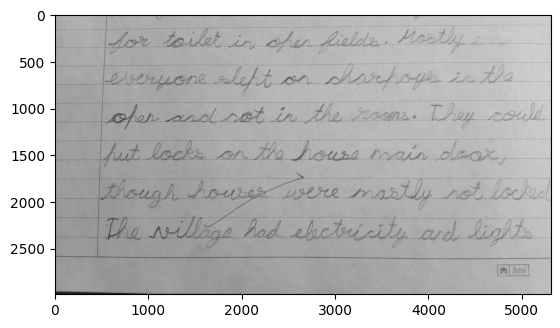

In [83]:
s_function=np.zeros(9,np.float64)
count_=np.zeros(9,np.uint64)
img=cv2.imread('temp.jpg')
img2=img.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img=255-img
plt.imshow(img,cmap='gray')

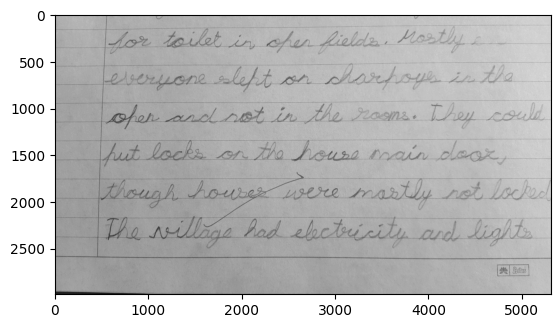

In [84]:
filtered_image= cv2.bilateralFilter(img, 5, 50, 50) 
plt.imshow(filtered_image,cmap='gray')

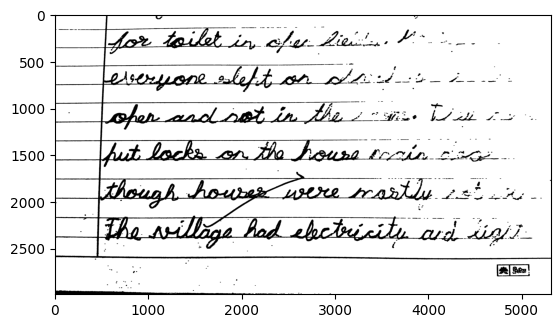

In [85]:
ret,threshold_img=cv2.threshold(filtered_image,135,255,cv2.THRESH_BINARY)
#plt.imshow(threshold_img,cmap='gray')
element=np.ones((5,10),np.uint8)
threshold_img=cv2.erode(threshold_img,element)
plt.imshow(threshold_img,cmap='gray')

In [86]:
data=pytesseract.image_to_data(threshold_img,output_type='dict')
# contours,_ = cv2.findContours(threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# temp=threshold_img.copy()
# # Loop through the contours
# for contour in contours:

#     # Get the bounding box of the contour
#     # peri=cv2.arcLength(contour,True)
#     # approx=cv2.approxPolyDP(contour,0.01*peri,True)
#     x, y, w, h = cv2.boundingRect(contour)

#     # Extract the text from the bounding box
#     #text = pytesseract.image_to_string(threshold_img[y:y+h, x:x+w])
#     cv2.rectangle(temp,(x,y),(x+w,y+h),(0,255,0),2)
#     # Print the coordinates of the word
#     #print(f'{text}: {x}, {y}, {w}, {h}')

In [87]:
boxes = len(data['level'])
words=[]
for i in range(boxes ):
    words.append((data['left'][i], data['top'][i], data['width'][i], data['height'][i]))
    #Draw box        
    #cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [88]:
angles=[ -45,-30, -15, -5, 0, 5, 15, 30,45]

In [89]:
def getVerticalProjectionProfile(image): 
  
    # Convert black spots to ones  
    #image[image == 0]   = 1
    # Convert white spots to zeros  
    image[image == 255] = 1
  
    vertical_projection = np.sum(image, axis = 0) 
  
    return vertical_projection 

In [99]:
for i in range (0,9):
    angle=angles[i]
    s_temp=0.0
    count=0
    for word in words:
     (x,y,w,h)=word
   #   if(x<0 or y<0):
   #      continue
     if(h<20 or w<20):
        continue
   #   if(w<0):
   #      print(w)
     original=threshold_img[x:x+h,y:y+w]
     shift=(np.tan(angle*np.pi/180)*h)/2
     pad_length=abs(int(shift))
   #   if(pad_length<0):
   #    print(pad_length)
     x=int(h)
     y=int(w+pad_length*2)
     if(x<=0 or y<=0):
        continue
     blank_image=np.zeros((int(x),int(y),3),np.uint8)
     new_image=cv2.cvtColor(blank_image,cv2.COLOR_BGR2GRAY)
   #   if(y<w):
   #      print(y,w)
     if(w!=np.shape(original)[1] or h!=np.shape(original)[0]):
        continue
     new_image[:,pad_length:w+pad_length]=original
     (h,w)=np.shape(new_image)[:2]
     x1=w/2
     y1=0
     x2=w/4
     y2=h
     x3=3*w/4
     y3=h
     pts1=np.float32([[x1,y1],[x2,y2],[x3,y3]])
     pts2=np.float32([[x1+shift,y1],[x2-shift,y2],[x3-shift,y3]])
     M = cv2.getAffineTransform(pts1, pts2)
     deslanted=cv2.warpAffine(new_image,M,(w,h))
     #print(deslanted)
     vp=getVerticalProjectionProfile(deslanted.copy())
     #print(vp)
     for vpk in vp:
        if(vpk==0):
           continue
        num_fgpixel=vpk
       # print(num_fgpixel,h)
        if num_fgpixel<h/3:
           continue
        
        s_temp=s_temp+num_fgpixel/h
        count=count+1
    if(count==0):
       continue
    
    s_function[i]=s_function[i]+s_temp/count
    count_[i]=count_[i]+1
index_max=np.argmax(s_function)
SLANT_ANGLE=angles[index_max]







In [101]:
print(SLANT_ANGLE)

-5
